In [24]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import random
import numpy as np

In [25]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

In [26]:
train_images = train_images[:1000]
train_labels = train_labels[:1000]


test_images = test_images[:100]
test_labels = test_labels[:100]

#print(train_images.shape)
#print(test_images.shape)

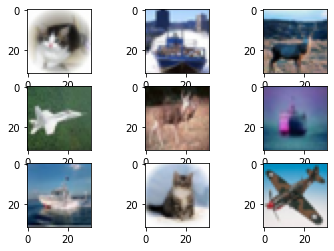

In [51]:
indexes = np.random.randint(0, 1000, 9)

fig, axs = plt.subplots(3, 3)
next_idx = 0
for i in range(3):
    for j in range(3):
        axs[i, j].imshow(train_images[indexes[next_idx]])
        next_idx += 1
        

In [64]:
train_images_normalized = train_images / 255
test_images_normalized = test_images / 255

train_labels_cat = tf.keras.utils.to_categorical(train_labels, 10)
test_labels_cat = tf.keras.utils.to_categorical(test_labels, 10)

In [75]:
model = models.Sequential()
model.add( layers.Conv2D(32, (3,3), activation = 'relu') )
model.add( layers.Conv2D(32, (3,3), activation = 'relu') )
model.add( layers.MaxPooling2D(2,2) )
model.add( layers.Dropout(0.25) )
model.add( layers.Conv2D(64, (3,3), activation = 'relu') )
model.add( layers.Conv2D(64, (3,3), activation = 'relu') )
model.add( layers.MaxPooling2D(2,2) )
model.add( layers.Dropout(0.25) )
model.add( layers.Flatten() )
model.add (layers.Dense(512, activation='relu') )
model.add (layers.Dense(10, activation='softmax') )

In [77]:
batch_size = 32
epochs = 10

model.compile(optimizer='adam', loss=tf.keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])

In [79]:
history = model.fit(train_images_normalized, train_labels_cat
         ,epochs=epochs, batch_size=batch_size
         ,validation_data=(test_images_normalized, test_labels_cat))

Epoch 1/10
32/32 [==============================] - 1s 26ms/step - loss: 1.1951 - accuracy: 0.5590 - val_loss: 1.8227 - val_accuracy: 0.3800
Epoch 2/10
32/32 [==============================] - 1s 25ms/step - loss: 1.0892 - accuracy: 0.6020 - val_loss: 1.8291 - val_accuracy: 0.3300
Epoch 3/10
32/32 [==============================] - 1s 24ms/step - loss: 0.9722 - accuracy: 0.6500 - val_loss: 1.9439 - val_accuracy: 0.3000
Epoch 4/10
32/32 [==============================] - 1s 25ms/step - loss: 0.8711 - accuracy: 0.6840 - val_loss: 1.7378 - val_accuracy: 0.4000
Epoch 5/10
32/32 [==============================] - 1s 25ms/step - loss: 0.8086 - accuracy: 0.7020 - val_loss: 2.1238 - val_accuracy: 0.3900
Epoch 6/10
32/32 [==============================] - 1s 25ms/step - loss: 0.6501 - accuracy: 0.7720 - val_loss: 2.2151 - val_accuracy: 0.3300
Epoch 7/10
32/32 [==============================] - 1s 25ms/step - loss: 0.5650 - accuracy: 0.8190 - val_loss: 2.4924 - val_accuracy: 0.3700
Epoch 8/10
32

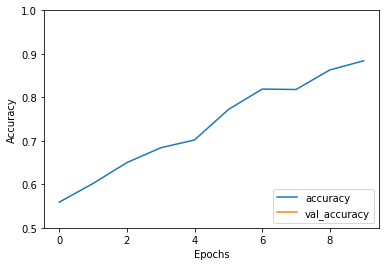

In [80]:
# mozemo sad vizuelizovati ono sto nas zanima
# note: accuracy se u ranijim verzijama tensorflowa zvao acc, pa da obratimo paznju na to koju verziju imamo
plt.plot(history.history['accuracy'], label = 'accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')